**K-Nearest Neighbors** is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">

In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points) we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.

In this sense, it is important to consider the value of k. But hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (points) when it predicts the classification of the test point.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#visualization_analysis">Data Visualization and Analysis</a></li>
        <li><a href="#classification">Classification</a></li>
    </ol>
</div>
<br>
<hr>

Lets load required libraries

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

<div id="about_dataset">
    <h2>About the dataset</h2>
</div>

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


### Load Data From CSV File  

In [4]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
df.shape

(1000, 12)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
region     1000 non-null int64
tenure     1000 non-null int64
age        1000 non-null int64
marital    1000 non-null int64
address    1000 non-null int64
income     1000 non-null float64
ed         1000 non-null int64
employ     1000 non-null int64
retire     1000 non-null float64
gender     1000 non-null int64
reside     1000 non-null int64
custcat    1000 non-null int64
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2> 
</div>


#### Let’s see how many of each class is in our data set 

In [6]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

#### 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers
from the result of value.counts(). we know we are dealing with a balanced dataset.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B7E94D5F8>]],
      dtype=object)

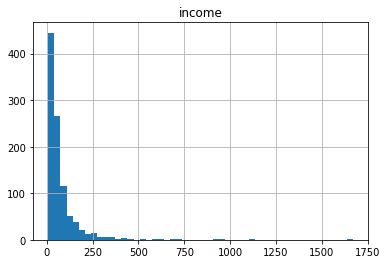

In [7]:
df.hist(column='income', bins=50)

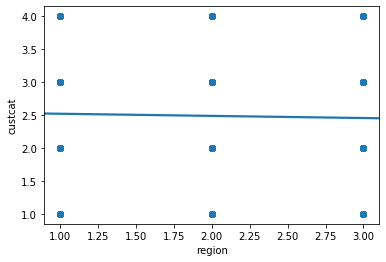

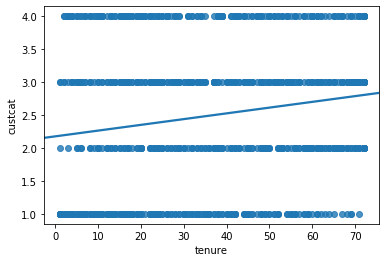

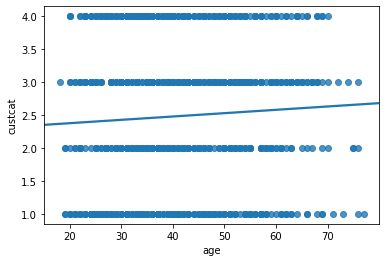

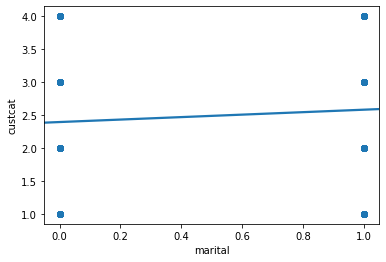

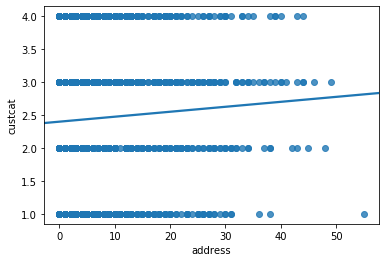

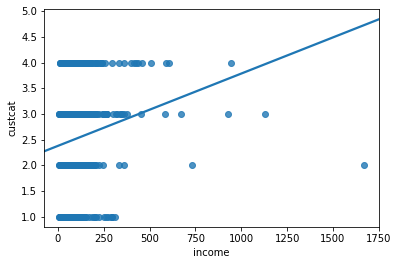

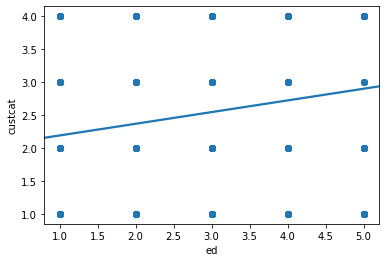

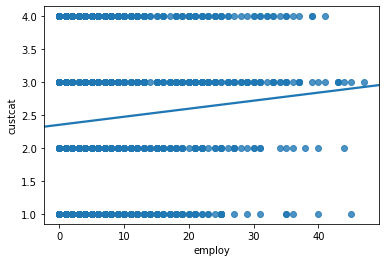

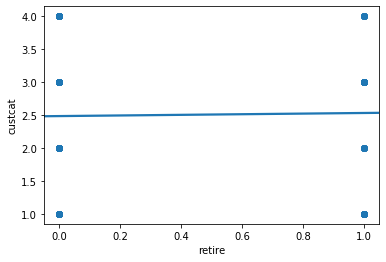

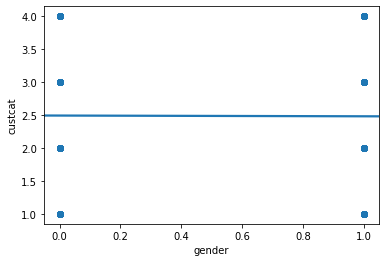

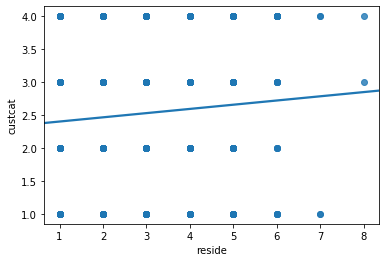

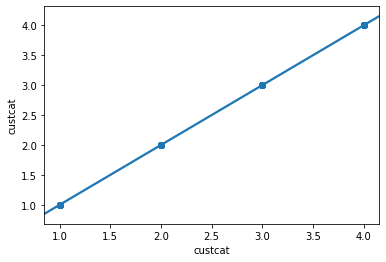

In [15]:
#we can plot a simple scatter plot to see which variables have a high correlation with the target label
import seaborn as sns
for i,col in enumerate(df):
    plt.figure(i)
    sns.regplot(x=col,y='custcat',data=df,ci=None)
        

In [16]:
#correlation of all the features
df.corr()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
region,1.000000,0.016388,0.015034,-0.080637,0.010320,0.023765,-0.057952,0.016335,0.005595,0.050596,-0.065158,-0.023771
tenure,0.016388,1.000000,0.490217,0.154171,0.522952,0.242912,-0.109797,0.520288,0.171143,0.023533,-0.036592,0.166691
age,0.015034,0.490217,1.000000,-0.014433,0.660435,0.327948,-0.154857,0.670047,0.429440,-0.011419,-0.254993,0.056909
marital,-0.080637,0.154171,-0.014433,1.000000,-0.012051,-0.043984,0.001400,-0.002891,-0.078109,0.008345,0.625999,0.083836
address,0.010320,0.522952,0.660435,-0.012051,1.000000,0.226781,-0.128330,0.463291,0.292503,0.008363,-0.201645,0.067913
income,0.023765,0.242912,0.327948,-0.043984,0.226781,1.000000,0.113939,0.516349,-0.083651,0.038706,-0.097591,0.134525
ed,-0.057952,-0.109797,-0.154857,0.001400,-0.128330,0.113939,1.000000,-0.228580,-0.114229,0.006704,0.021045,0.193864
employ,0.016335,0.520288,0.670047,-0.002891,0.463291,0.516349,-0.228580,1.000000,0.277401,0.046016,-0.134683,0.110011
retire,0.005595,0.171143,0.429440,-0.078109,0.292503,-0.083651,-0.114229,0.277401,1.000000,0.053906,-0.140120,0.008908
gender,0.050596,0.023533,-0.011419,0.008345,0.008363,0.038706,0.006704,0.046016,0.053906,1.000000,0.016556,-0.004966


C:\Users\Homet\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Homet\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Homet\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Homet\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Homet\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Homet\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x

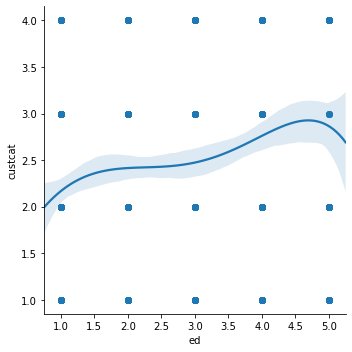

In [18]:
#a polynomial line plot
#from the plot below even a ploynomial plot can capture the relationship effectively between the feature and target label
sns.lmplot(x='ed',y='custcat',order=5,data=df)


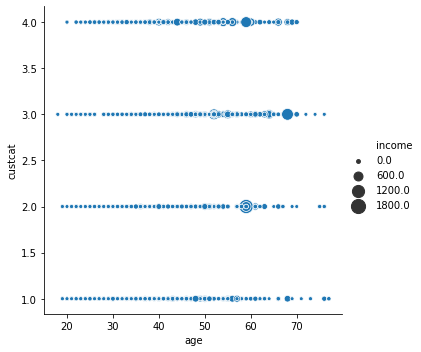

In [24]:
#to see how a particular fearture interacts with the target label in the presence of another feature
#lets plot age,income and gender.
sns.relplot(x='age',y='custcat',size='income',sizes=(15,200),data=df)

In [47]:
df[df['custcat']==2].min()

region      1.0
tenure      1.0
age        19.0
marital     0.0
address     0.0
income      9.0
ed          1.0
employ      0.0
retire      0.0
gender      0.0
reside      1.0
custcat     2.0
dtype: float64

In [58]:
df.region

0      2
1      3
2      3
3      2
4      2
      ..
995    3
996    1
997    3
998    3
999    3
Name: region, Length: 1000, dtype: int64

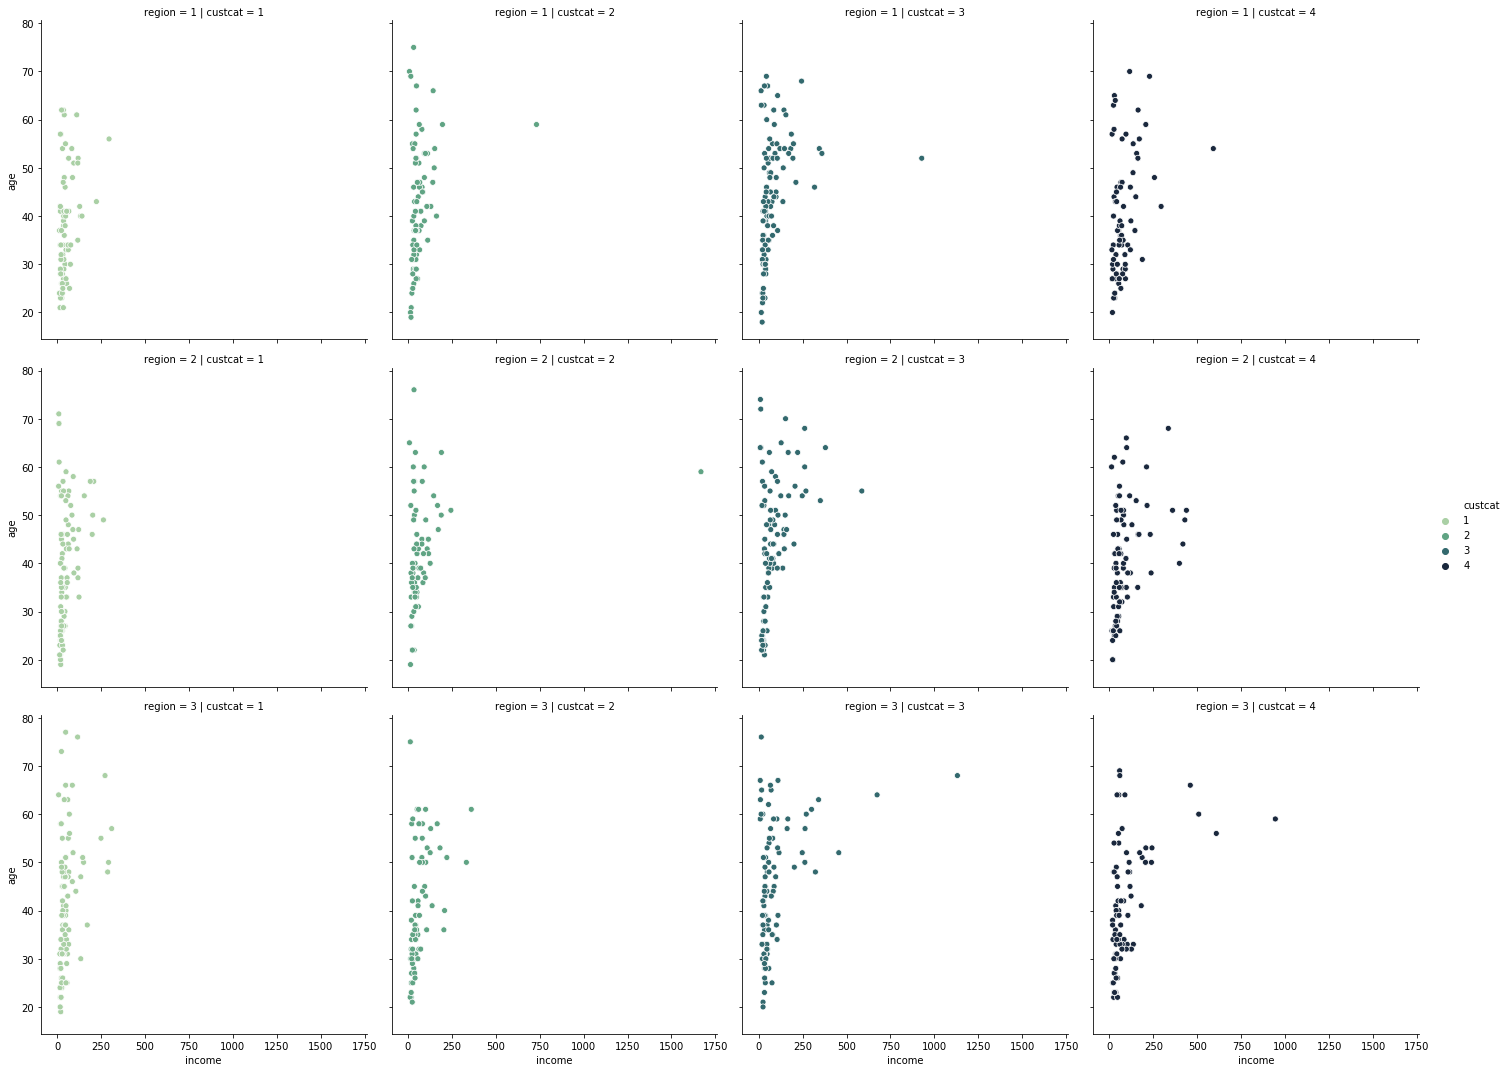

In [59]:
sns.relplot(x='income',y='age',hue='custcat',palette="ch:r=-.5,l=.75",col='custcat',row='region',data=df,height=5)

### Feature set

Lets define feature sets, X:

In [60]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [61]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

we assign the target label to the y variable

In [62]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Normalize Data 

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases. However for decision trees based algorithm scaling of the data has no significant effect on the performance.

In [63]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train Test Split  
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


<div id="classification">
    <h2>Classification</h2>
</div>

<h3>K nearest neighbor (KNN)</h3>

#### Import library 

Classifier implementing the k-nearest neighbors vote.

In [69]:
from sklearn.neighbors import KNeighborsClassifier

### Training

Lets start the algorithm with k=4 for now:

In [70]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

### Predicting
we can use the model to predict the test set:

In [71]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

### Accuracy evaluation
In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [76]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  0.5025
Test set Accuracy:  0.34
0.5025


from the above we see that the model accuracy on the train set is average and on the test set we see that it performs even worse.We can try predicting with different values of K to see if it would improve performance.

In [83]:
# instead of manually inserting the value for K we can take advantage of sklearn gridsearch cv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit


In [98]:
#using shuffle split we split the data into ten folds with each fold having an equal split of test and train data
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=15)

In [99]:
#setting up the values for the param_grid
param_grid=dict(n_neighbors=[3,6,9,12,15])

In [100]:
grid_search=GridSearchCV(neigh, param_grid, cv=shuffle_split)

In [101]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=15, random_state=None, test_size=0.5, train_size=0.5),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=9, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [3, 6, 9, 12, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [102]:
grid_search.score(X_train,y_train)

0.47375

In [103]:
grid_search.score(X_test,y_test)

0.34

In [104]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [107]:
prediction=grid_search.predict(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

In [108]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, prediction)
print("Confusion matrix:\n{}".format(confusion))


Confusion matrix:
[[24 10 11  6]
 [ 7 11 11 15]
 [18 10 23  3]
 [19 11 11 10]]


In [111]:
from sklearn.metrics import f1_score
print("f1 : {:.2f}".format(
 f1_score(y_test, prediction,average='macro')))

f1 : 0.33


In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction,
 target_names=["1", "2","3","4"]))

              precision    recall  f1-score   support

           1       0.35      0.47      0.40        51
           2       0.26      0.25      0.26        44
           3       0.41      0.43      0.42        54
           4       0.29      0.20      0.24        51

    accuracy                           0.34       200
   macro avg       0.33      0.34      0.33       200
weighted avg       0.33      0.34      0.33       200



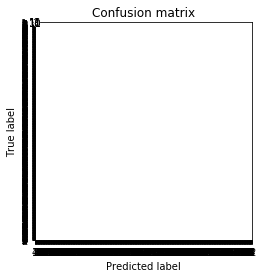

In [124]:
import mglearn
scores_image = mglearn.tools.heatmap(
 confusion_matrix(y_test, prediction), xlabel='Predicted label',
 ylabel='True label', xticklabels=df.custcat,
 yticklabels=df.custcat, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [120]:
! pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582644 sha256=3d0679da1ca9d14d73231942f3b98f78c9005e81da6c5c88eb4a5f42feca001a
  Stored in directory: C:\Users\Homet\AppData\Local\pip\Cache\wheels\eb\a6\ea\a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn
